In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/feature/train.csv',parse_dates=['date'],dtype={'link_ID':str})

In [5]:
data[(data.month==7)&(data.time_start_hour==16)]

,link_ID,date,travel_time,month,day,week,time_start,time_start_hour,time_start_min,time_start_quarter,...,mean_quater_27,max_quater_27,min_quater_27,median_quater_27,quater_quater_27,quater3_quater_27,increment_quater_27,c8_cluster,c15_cluster,c18_cluster


In [63]:
grp = data[data.month!=7].groupby(['link_ID','time_start_hour'])

In [64]:
c = grp['travel_time'].agg(['mean']).reset_index()

In [67]:
c[c.time_start_hour==8]['mean']

1       6.625174
8      31.494350
15      4.162286
22     10.198958
29      6.326110
36      4.895292
43     13.366692
50     35.430077
57      4.729384
64      1.925132
71     29.447355
78     26.594290
85     25.378629
92     33.872418
99      5.143254
106    11.096731
113     6.924007
120     9.718019
127     1.642138
134     5.342928
141    19.471607
148    50.528514
155     1.542459
162    19.210033
169    52.321870
176    19.422362
183     2.815327
190    12.540255
197    36.848971
204    54.216955
         ...    
715    28.284604
722    15.653377
729    20.567540
736    10.195610
743     5.698353
750    33.163175
757    56.710380
764    12.149110
771    30.596201
778    15.378007
785     3.851750
792     2.076036
799     9.457798
806    48.339047
813     2.914883
820    26.507276
827     3.301254
834    28.845827
841     7.048039
848     7.332008
855     1.874098
862    15.677823
869    12.548462
876     1.692540
883    20.798899
890     2.926750
897    71.260741
904     6.9202

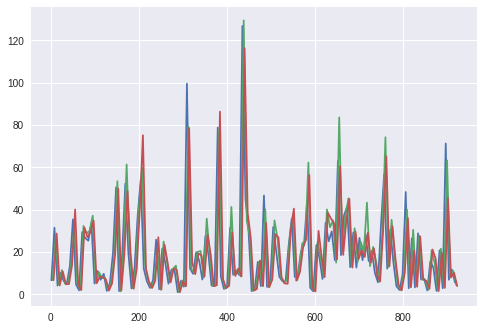

In [66]:
plt.plot(c[c.time_start_hour==8]['mean'])
plt.plot(c[c.time_start_hour==15]['mean'])
plt.plot(c[c.time_start_hour==18]['mean'])
plt.show()

In [57]:
x1=c[(c.month==7)&(c.time_start_hour==13)]
x2=c[(c.month==6)&(c.time_start_hour==13)]
n = pd.merge(x1,x2,how='left',on=['link_ID','time_start_hour'])

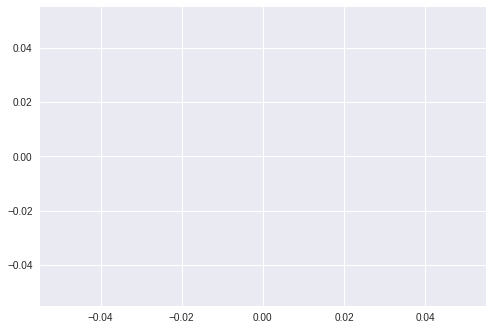

In [58]:
plt.plot(n['mean_x'] - n['mean_y'])
plt.show()

In [28]:
set(c[c.month==5]['link_ID'].tolist())-set(c[c.month==6]['link_ID'].tolist())

{'3377906282328510514', '3377906283328510514'}

In [2]:
recrd = pd.read_csv('./data/gy_contest_link_traveltime_training_data.txt',sep=';',parse_dates=['date'])

In [3]:
link_info = pd.read_csv('./data/gy_contest_link_info.txt',sep=';')

In [4]:
link_top = pd.read_csv('./data/gy_contest_link_top.txt',sep=';')

In [5]:
def split(x):
    if type(x)!=str:
        return []
    else:
        return x.split('#')

In [6]:
link_top['in_links'] = link_top['in_links'].apply(split)
link_top['out_links'] = link_top['out_links'].apply(split)

In [7]:
link_top['in_link_num'] = link_top['in_links'].apply(lambda x: len(x))
link_top['out_link_num'] = link_top['out_links'].apply(lambda x: len(x))

In [8]:
ulimit = np.percentile(recrd.travel_time.values,99)

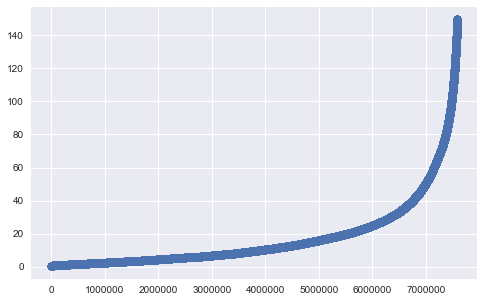

In [43]:
plt.figure(figsize=[8,5])
plt.scatter(np.arange(len(recrd[recrd.travel_time<=ulimit].travel_time)),np.sort(recrd[recrd.travel_time<=ulimit].travel_time.values))
plt.ylabel('travel_time')
plt.show()

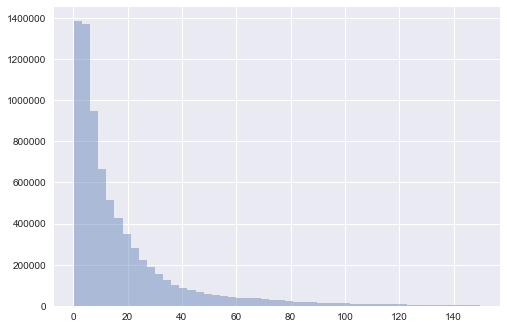

In [28]:
sns.distplot(recrd[recrd.travel_time<=ulimit].travel_time.values,bins=50,kde=False)
plt.xlabel('travel_time')
plt.show()

In [9]:
recrd['month'] = recrd['date'].dt.month.astype('int8')
recrd['day'] = recrd['date'].dt.day.astype('int8')
recrd['week'] = recrd['date'].dt.weekday.astype('int8')

In [10]:
recrd['time_start_hour']=recrd['time_interval'].apply(lambda x: int(x.split(',')[0][1:].split(' ')[1].split(':')[0])).astype('int8')
recrd['time_start_min']=recrd['time_interval'].apply(lambda x: int(x.split(',')[0][1:].split(' ')[1].split(':')[1])).astype('int8')
recrd['time_end_hour']=recrd['time_interval'].apply(lambda x: int(x.split(',')[1].split(' ')[1].split(':')[0])).astype('int8')
recrd['time_end_min']=recrd['time_interval'].apply(lambda x: int(x.split(',')[1].split(' ')[1].split(':')[1])).astype('int8')

In [11]:
recrd.drop(['time_interval','date'],axis=1,inplace=True)

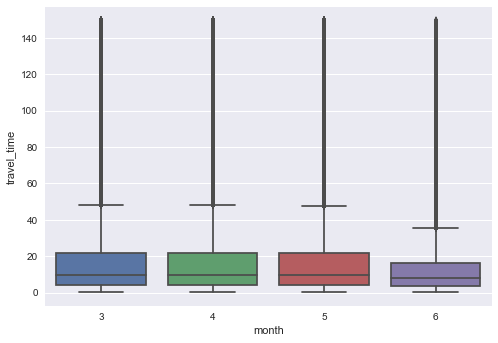

In [16]:
sns.boxplot(x="month", y="travel_time", data=recrd[recrd.travel_time<ulimit])
plt.show()

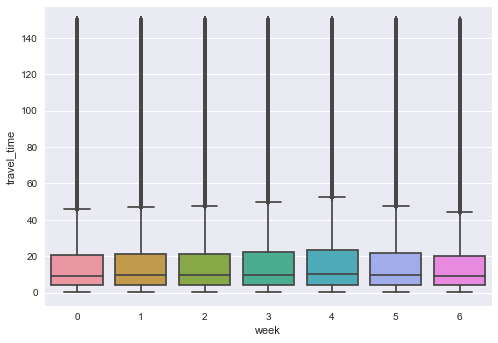

In [17]:
sns.boxplot(x="week", y="travel_time", data=recrd[recrd.travel_time<ulimit])
plt.show()

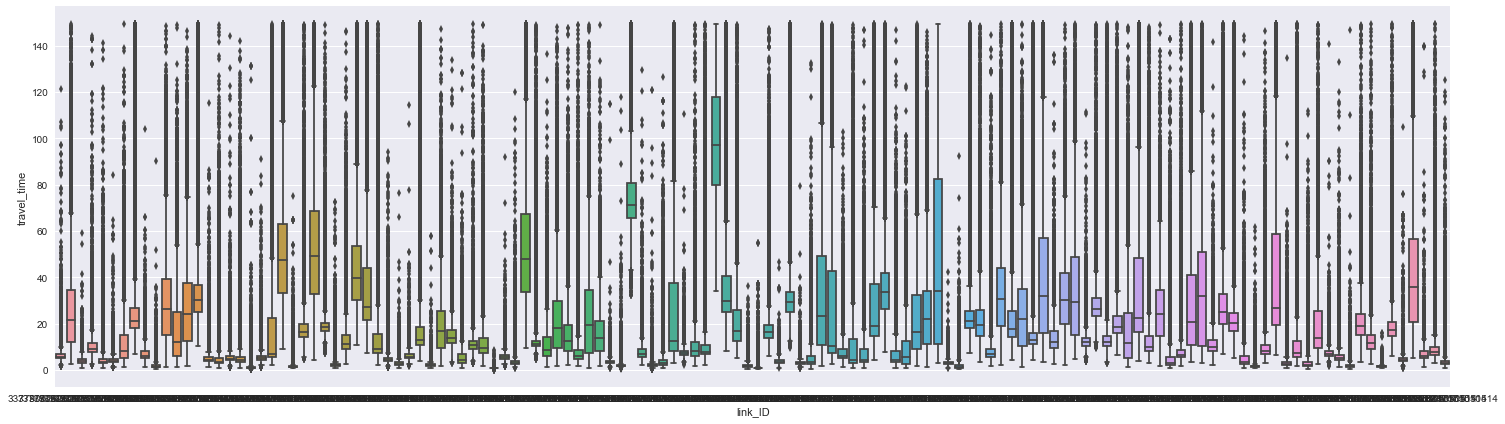

In [20]:
plt.figure(figsize=[30,7])
sns.boxplot(x="link_ID", y="travel_time", data=recrd[recrd.travel_time<ulimit])
plt.show()

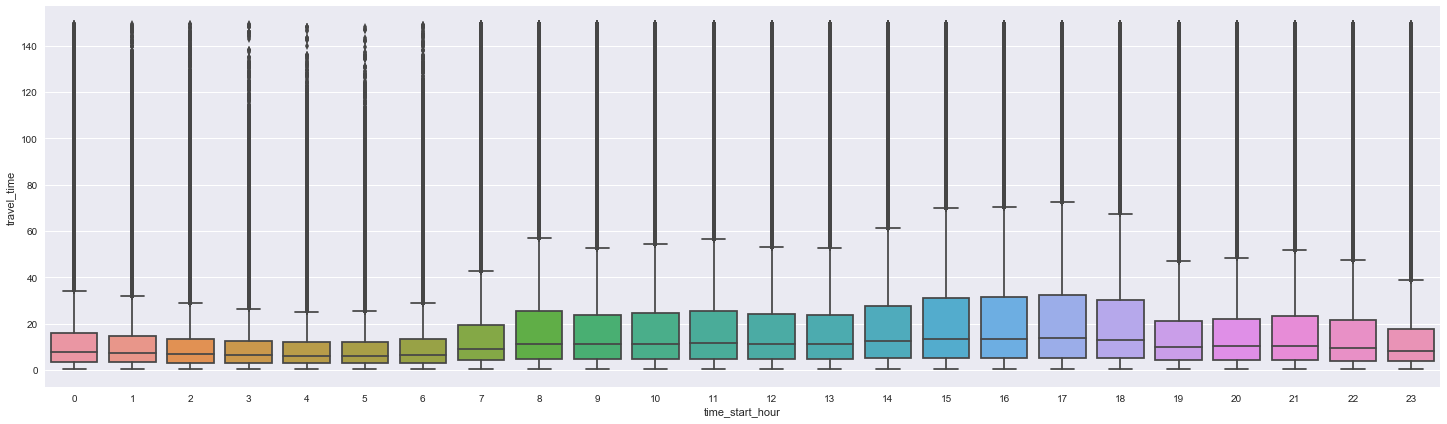

In [21]:
plt.figure(figsize=[25,7])
sns.boxplot(x="time_start_hour", y="travel_time", data=recrd[recrd.travel_time<ulimit])
plt.show()

In [47]:
month_cnt = recrd['month'].value_counts()
day_cnt = recrd['day'].value_counts()
week_cnt = recrd['week'].value_counts()
link_cnt = recrd['link_ID'].value_counts()

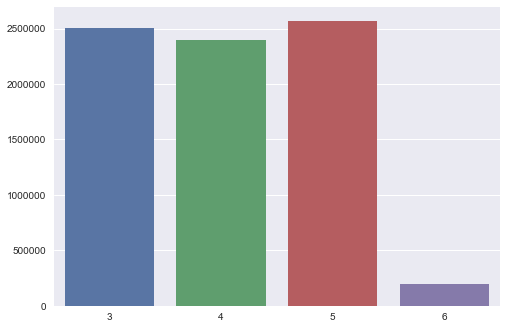

In [42]:
sns.barplot(month_cnt.index.values,month_cnt.values)
plt.xlabel('month')
plt.show()

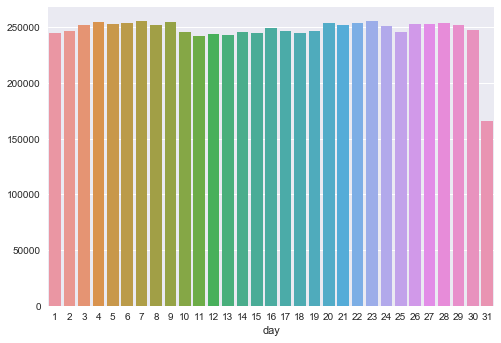

In [44]:
sns.barplot(day_cnt.index.values,day_cnt.values)
plt.xlabel('day')
plt.show()

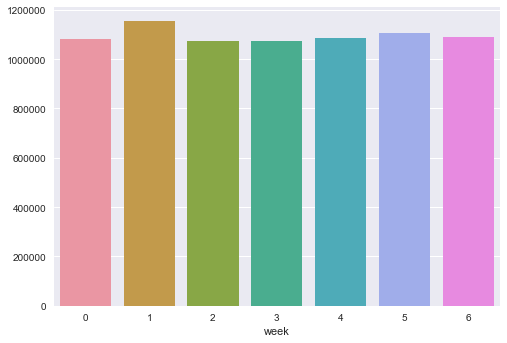

In [45]:
sns.barplot(week_cnt.index.values,week_cnt.values)
plt.xlabel('week')
plt.show()

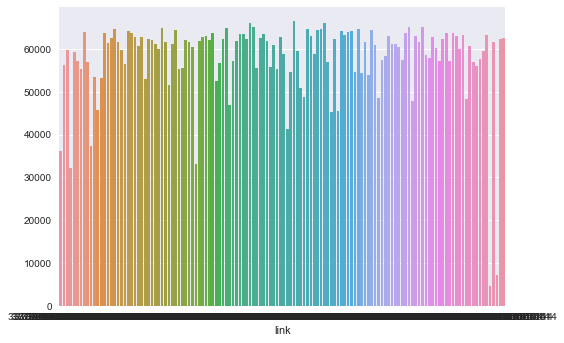

In [48]:
sns.barplot(link_cnt.index.values,link_cnt.values)
plt.xlabel('link')
plt.show()

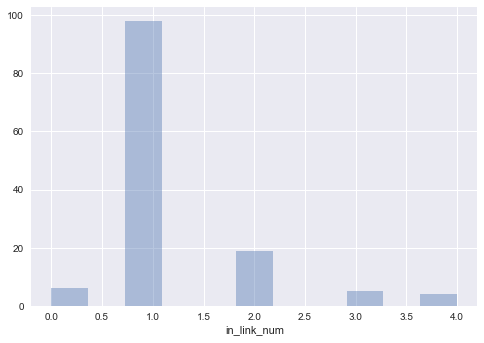

In [97]:
sns.distplot(link_top['in_link_num'].values,kde=False)
plt.xlabel('in_link_num')
plt.show()

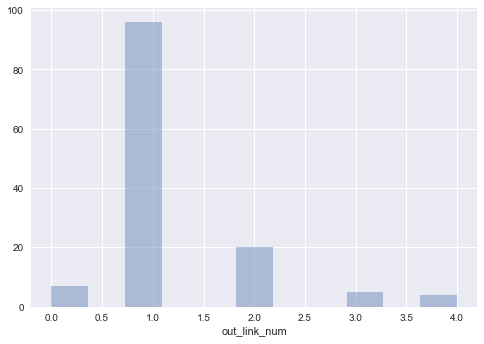

In [98]:
sns.distplot(link_top['out_link_num'].values,kde=False)
plt.xlabel('out_link_num')
plt.show()